In [1]:
# Install package to change jupyter to slide mode
#conda install -c conda-forge/ rise

In [2]:
import warnings 

warnings.filterwarnings('ignore')

## DATA WRANGLING GROUP PROJECT - IMDB MOVIE DATASET

Annie

Hasti 

Peaches 

Tatjana - Team Lead

# 1.0 Objective and Problem Statements

In real life, data scientists and analysts are almost never given a clean dataset that they can just plug into their analysis.  Reasons for this are many, most important being that data is seldomly collected for the purpose of doing data analysis on it.  It is usually collected as part of the normal business processes and often across multiple systems.  Therefore, before we, as data analysts, can attempt to analyse the data, we need to bring it to a usable form, cleaned and optimized for the purpose we need it for.  Hence, the term data wrangling.  We need to wrangle with it until we can get it in the format that we want it in.

The objective of this project was just that - to find a dataset to answer some question or use in machine learning models and to wrangle with it until we bring it into a shape and form where it can be used to answer the question or make a prediction.

Some of the questions that can be answered with this dataset are as follows:
1.  What is the most popular genre
2.  What are the top studios based on number of released movies or gross eranings
3.  Which actors/actresses produced most movies
4.  Are there any trends in the number of movies produced per year
5.  Are there any months when more movies are released than usual
6.  What are the top 10 movies based on income/ popular vote 
7.  Which directors produce movies with highest income

The datasets can also be used for model building, although we did not do it.  Some of the predictions that can be built is which movie would win and Oskar, how much profit a movie would make etc.  

## 2.0 Datasets and Background
A dataset consisting of 4 csv files was selected from Kaggle at https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset
The movies dataset includes 85,855 movies with attributes such as movie description, average rating, number of votes, genre, etc.  The names dataset includes 297,705 cast members with personal attributes such as birth details, death details, height, spouses, children, etc.  The ratings dataset includes 85,855 rating details from demographic perspective.  The title principals dataset includes 835,513 cast members roles in movies.  The complete description of variables retained after file manipulation is provided further down in the notebook.

In addition, Rotten Tomatoes movie ratings were obtained from Kaggle at https://www.kaggle.com/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset and financial data was scraped from the web at https://www.boxofficemojo.com/year/world/?ref_=bo_nb_hm_tab

Due to the large size of files and lesser availability of data for older movies, it was decided to filter all datasets and only retain movies with a release date between 2000 and 2019.

## 3.0 DATA IMPORT & INSPECTION

In [3]:
#Import Libraries that we may need for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'

In [4]:
#Import dataset
imdb_movies=pd.read_csv("IMDb movies.csv", low_memory=False)
imdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

We noted here many missing values on the budget, US gross income, worldwide gross income metascore, reviews from users and reviews from critics.  In an effort to fill these missing values we obtained additional datasets from Rotten Tomatoes and Box Office Mojo.  Given that we decided to narrow our dataset to only selected years, we also need to find out how many of these missing values pertain to the years in scope.

In [5]:
#Convert the string to the integer (year column) - we need this to filter only year range 2000-2019
def convert_str_to_int(column):
    if pd.isnull(column) == True:
        return column
    if type(column) != str:
        return column
    else:
        string = column.split(' ')[-1]
        string = string.replace("'", '')
        #string = string.replace(',', '')
        return int(string)
    
imdb_movies["year"] = imdb_movies["year"].apply(convert_str_to_int)
#imdb_movies["year"].unique()

In [6]:
#Filter dataset on condition (year range 2000-2019) and display the first 5 movies
imdb_selected_years = imdb_movies[(imdb_movies["year"] >= 2000) & (imdb_movies["year"] <= 2019)]
imdb_selected_years.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
4334,tt0035423,Kate & Leopold,Kate & Leopold,2001,2002-03-01,"Comedy, Fantasy, Romance",118,USA,"English, French",James Mangold,...,"Meg Ryan, Hugh Jackman, Liev Schreiber, Brecki...",An English Duke from 1876 is inadvertedly drag...,6.4,77852,$ 48000000,$ 47121859,$ 76019048,44.0,341.0,115.0
14127,tt0064730,Nihon boryoku-dan: Kumicho,Nihon boryoku-dan: Kumicho,2000,1969,"Action, Crime",97,Japan,Japanese,Kinji Fukasaku,...,"Kôji Tsuruta, Tomisaburô Wakayama, Bunta Sugaw...",Coming out of jail and hoping for a quiet life...,7.0,168,NaN,NaN,NaN,NaN,3.0,5.0
15675,tt0069049,L'altra faccia del vento,The Other Side of the Wind,2018,2018-11-02,Drama,122,"France, Iran, USA","English, German",Orson Welles,...,"John Huston, Oja Kodar, Peter Bogdanovich, Sus...",A Hollywood director emerges from semi-exile w...,6.8,5887,NaN,NaN,NaN,78.0,81.0,98.0
21806,tt0088751,The Naked Monster,The Naked Monster,2005,2005-04-22,"Comedy, Horror, Sci-Fi",100,USA,English,"Wayne Berwick, Ted Newsom",...,"Kenneth Tobey, Brinke Stevens, R.G. Wilson, Jo...","A brain-dead sheriff, a stolid secret agent an...",5.4,264,PYG 350000000,NaN,NaN,NaN,15.0,8.0
24217,tt0096056,Delitto e castigo,Crime and Punishment,2002,2002-06-01,Drama,126,"Poland, Russia, USA","English, Polish",Menahem Golan,...,"Crispin Glover, Vanessa Redgrave, John Hurt, M...",A modern day adaptation of Dostoyevsky's class...,5.8,633,NaN,NaN,NaN,NaN,13.0,NaN


In [7]:
#Now that we have narrowed the year range, lets look at the missing values again
na_imdb_col= imdb_selected_years.isnull().sum()
na_imdb_col[na_imdb_col != 0]

country                     51
language                   460
director                    64
writer                    1029
production_company        2602
actors                      54
description               1254
budget                   30407
usa_gross_income         37241
worlwide_gross_income    21404
metascore                36617
reviews_from_users        4752
reviews_from_critics      5539
dtype: int64

We noted above that significant numbers of missing values still exist especially in the columns on the financial data, we therefore believe that filling these values from the Box Office Mojo website would add value.  However before we can do that, we need to convert all currencies into USD and get rid of $, USD signs in order to change the datatype to float

In [8]:
# Install package for currency conventer
!pip install currencyconverter

In [9]:
# To convert all currencies into USD and get rid of $
from currency_converter import CurrencyConverter
imdb_selected_years['budget'] = imdb_selected_years['budget'].astype(str) 


In [10]:
# As an example, the Worldwide Currency Column is a string and has currency abbreviation before the number
imdb_selected_years[imdb_selected_years['imdb_title_id']=="tt0458050"]

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
47634,tt0458050,Paruthiveeran,Paruthiveeran,2007,2007-02-23,"Action, Drama, Romance",162,India,Tamil,Ameer Sultan,...,"Karthi, Priyamani, Saravanan, Ponvannan, Sujat...",A village tough finally succumbs to the uncond...,8.2,3004,nan,NaN,INR 360000000,NaN,16.0,4.0


In [11]:
# Create budget_currency column and formatting budget column into numeric values for converting to usd

imdb_selected_years['budget_currency'] = imdb_selected_years['budget'].str.split(' ', expand = True)[0]
imdb_selected_years['budget_currency'] = imdb_selected_years['budget_currency'].str.replace('$', 'USD')
imdb_selected_years['budget'] = imdb_selected_years['budget'].str.split(' ', expand = True)[1]
imdb_selected_years['budget'] = pd.to_numeric(imdb_selected_years['budget'], errors='coerce')

# Create worlwide_gross_income_currency column and formatting worlwide_gross_income column into numeric values for converting to usd
imdb_selected_years['worlwide_gross_income_currency'] = imdb_selected_years['worlwide_gross_income'].str.split(' ', expand = True)[0]
imdb_selected_years['worlwide_gross_income_currency'] = imdb_selected_years['worlwide_gross_income_currency'].str.replace('$', 'USD')
imdb_selected_years['worlwide_gross_income'] = imdb_selected_years['worlwide_gross_income'].str.split(' ', expand = True)[1]
imdb_selected_years['worlwide_gross_income'] = pd.to_numeric(imdb_selected_years['worlwide_gross_income'], errors='coerce')

# Create usa_gross_income_currency column and formatting usa_gross_income column into numeric values for converting to usd
imdb_selected_years['usa_gross_income_currency'] = imdb_selected_years['usa_gross_income'].str.split(' ', expand = True)[0]
imdb_selected_years['usa_gross_income_currency'] = imdb_selected_years['usa_gross_income_currency'].str.replace('$', 'USD')
imdb_selected_years['usa_gross_income'] = imdb_selected_years['usa_gross_income'].str.split(' ', expand = True)[1]
imdb_selected_years['usa_gross_income'] = pd.to_numeric(imdb_selected_years['usa_gross_income'], errors='coerce')

In [12]:
# To check if we have INR courrency
imdb_selected_years[(imdb_selected_years['worlwide_gross_income_currency']=='INR')]

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,budget_currency,worlwide_gross_income_currency,usa_gross_income_currency
37817,tt0242256,Alai Payuthey,Alai Payuthey,2000,2000-04-14,"Drama, Musical, Romance",156,India,Tamil,Mani Ratnam,...,4933,NaN,NaN,3.500000e+08,NaN,23.0,4.0,nan,INR,NaN
38879,tt0262037,Thenali,Thenali,2000,2000-10-27,"Comedy, Drama",164,India,Tamil,K.S. Ravikumar,...,1879,NaN,NaN,3.000000e+08,NaN,9.0,NaN,nan,INR,NaN
40776,tt0294264,Aalavandhan,Aalavandhan,2001,2001-11-16,"Action, Thriller",177,India,"Tamil, Hindi, Telugu",Suresh Krishna,...,1926,NaN,NaN,3.310560e+07,NaN,18.0,19.0,nan,INR,NaN
43625,tt0366180,Stalin,Stalin,2006,2006-09-20,"Action, Drama",168,India,Telugu,A.R. Murugadoss,...,1183,NaN,65500.0,3.200000e+08,NaN,11.0,5.0,nan,INR,USD
44112,tt0376144,Saamy,Saamy,2003,2003-05-01,"Action, Drama",150,India,Tamil,Hari,...,1542,NaN,NaN,5.100000e+08,NaN,1.0,NaN,nan,INR,NaN
47207,tt0449869,Chandramukhi,Chandramukhi,2005,2005-04-13,"Action, Comedy, Fantasy",166,India,Tamil,P. Vasu,...,4947,NaN,NaN,7.500000e+08,NaN,36.0,20.0,nan,INR,NaN
47634,tt0458050,Paruthiveeran,Paruthiveeran,2007,2007-02-23,"Action, Drama, Romance",162,India,Tamil,Ameer Sultan,...,3004,NaN,NaN,3.600000e+08,NaN,16.0,4.0,nan,INR,NaN
47895,tt0463939,Chellame,Chellame,2004,2004,"Action, Romance, Thriller",155,India,Tamil,A.R. Gandhi Krishna,...,322,NaN,NaN,5.000000e+07,NaN,NaN,NaN,nan,INR,NaN
51189,tt0888503,Imsai Arasan 23 M Pulikesi,Imsai Arasan 23 M Pulikesi,2006,2006,Comedy,142,India,Tamil,Chimbudeven,...,991,NaN,NaN,1.500000e+08,NaN,5.0,NaN,nan,INR,NaN
57889,tt1417299,Unnaipol Oruvan,Unnaipol Oruvan,2009,2009-09-18,"Crime, Drama, Mystery",106,India,Tamil,Chakri Toleti,...,5063,NaN,NaN,5.000000e+08,NaN,13.0,2.0,nan,INR,NaN


In [13]:
# Convert currencies into USD

c = CurrencyConverter()
for i in range(imdb_selected_years.shape[0]):
    # budget column
    if (imdb_selected_years['budget_currency'].iloc[i] in c.currencies):
        imdb_selected_years['budget'].iloc[i] = c.convert(imdb_selected_years['budget'].iloc[i], 
                                                          imdb_selected_years['budget_currency'].iloc[i], 'USD')
    else :
        imdb_selected_years['budget'].iloc[i] = np.nan
   
    # worlwide_gross_income column   
    if (imdb_selected_years['worlwide_gross_income_currency'].iloc[i] in c.currencies):
        imdb_selected_years['worlwide_gross_income'].iloc[i] = c.convert(
            imdb_selected_years['worlwide_gross_income'].iloc[i], 
            imdb_selected_years['worlwide_gross_income_currency'].iloc[i], 'USD', )
    else :
        imdb_selected_years['worlwide_gross_income'].iloc[i] = np.nan


In [14]:
#Check for duplicated movie titles within the dataset
imdb_selected_years[imdb_selected_years['imdb_title_id'].duplicated()]

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,budget_currency,worlwide_gross_income_currency,usa_gross_income_currency


No duplicate movies were identified

In [15]:
#to see which years have missing income so we know which ones to pull from the website
grouped=imdb_selected_years[(imdb_selected_years["worlwide_gross_income"].isnull())].groupby('year')['imdb_title_id'].count()
grouped

year
2000     883
2001     813
2002     615
2003     670
2004     750
2005     837
2006     813
2007     653
2008     758
2009     940
2010     999
2011    1099
2012    1181
2013    1375
2014    1526
2015    1501
2016    1529
2017    1592
2018    1523
2019    1349
Name: imdb_title_id, dtype: int64

Looks like we have to get all the years in scope

## 4.0 Fill Missing values by getting additional data from website

In [16]:
#Import box office data by year for selected years from the website 
dict_of_dfs = {}
for i in range(2000, 2020):
    f_name = f'df_{i}'
    dict_of_dfs[f_name]= f'table_{i}'
    df= pd.read_html(f'https://www.boxofficemojo.com/year/world/{i}/')
    dict_of_dfs[f_name]= df[0]
    display(dict_of_dfs[f_name].head(2))

,Rank,Release Group,Worldwide,Domestic,%,Foreign,%.1
0,1,Mission: Impossible II,"$546,388,108","$215,409,889",39.4%,"$330,978,219",60.6%
1,2,Gladiator,"$460,583,960","$187,705,427",40.8%,"$272,878,533",59.2%


,Rank,Release Group,Worldwide,Domestic,%,Foreign,%.1
0,1,Harry Potter and the Sorcerer's Stone,"$974,755,371","$317,575,550",32.6%,"$657,179,821",67.4%
1,2,The Lord of the Rings: The Fellowship of the Ring,"$880,839,846","$313,364,114",35.6%,"$567,475,732",64.4%


,Rank,Release Group,Worldwide,Domestic,%,Foreign,%.1
0,1,The Lord of the Rings: The Two Towers,"$936,689,735","$339,789,881",36.3%,"$596,899,854",63.7%
1,2,Harry Potter and the Chamber of Secrets,"$878,979,634","$261,988,482",29.8%,"$616,991,152",70.2%


,Rank,Release Group,Worldwide,Domestic,%,Foreign,%.1
0,1,The Lord of the Rings: The Return of the King,"$1,140,682,011","$377,027,325",33.1%,"$763,654,686",66.9%
1,2,Finding Nemo,"$871,014,978","$339,714,978",39%,"$531,300,000",61%


,Rank,Release Group,Worldwide,Domestic,%,Foreign,%.1
0,1,Shrek 2,"$928,760,770","$441,226,247",47.5%,"$487,534,523",52.5%
1,2,Harry Potter and the Prisoner of Azkaban,"$795,634,069","$249,541,069",31.4%,"$546,093,000",68.6%


,Rank,Release Group,Worldwide,Domestic,%,Foreign,%.1
0,1,Harry Potter and the Goblet of Fire,"$895,921,036","$290,013,036",32.4%,"$605,908,000",67.6%
1,2,Star Wars: Episode III - Revenge of the Sith,"$868,352,530","$380,270,577",43.8%,"$488,081,953",56.2%


,Rank,Release Group,Worldwide,Domestic,%,Foreign,%.1
0,1,Pirates of the Caribbean: Dead Man's Chest,"$1,066,179,725","$423,315,812",39.7%,"$642,863,913",60.3%
1,2,The Da Vinci Code,"$760,006,945","$217,536,138",28.6%,"$542,470,807",71.4%


,Rank,Release Group,Worldwide,Domestic,%,Foreign,%.1
0,1,Pirates of the Caribbean: At World's End,"$960,996,492","$309,420,425",32.2%,"$651,576,067",67.8%
1,2,Harry Potter and the Order of the Phoenix,"$941,676,843","$292,004,738",31%,"$649,672,105",69%


,Rank,Release Group,Worldwide,Domestic,%,Foreign,%.1
0,1,The Dark Knight,"$1,003,045,358","$533,345,358",53.2%,"$469,700,000",46.8%
1,2,Indiana Jones and the Kingdom of the Crystal S...,"$790,653,942","$317,101,119",40.1%,"$473,552,823",59.9%


,Rank,Release Group,Worldwide,Domestic,%,Foreign,%.1
0,1,Avatar,"$2,743,577,587","$749,766,139",27.3%,"$1,993,811,448",72.7%
1,2,Harry Potter and the Half-Blood Prince,"$933,959,197","$301,959,197",32.3%,"$632,000,000",67.7%


,Rank,Release Group,Worldwide,Domestic,%,Foreign,%.1
0,1,Toy Story 3,"$1,066,969,703","$415,004,880",38.9%,"$651,964,823",61.1%
1,2,Alice in Wonderland,"$1,025,467,110","$334,191,110",32.6%,"$691,276,000",67.4%


,Rank,Release Group,Worldwide,Domestic,%,Foreign,%.1
0,1,Harry Potter and the Deathly Hallows: Part 2,"$1,341,511,219","$381,011,219",28.4%,"$960,500,000",71.6%
1,2,Transformers: Dark of the Moon,"$1,123,794,079","$352,390,543",31.4%,"$771,403,536",68.6%


,Rank,Release Group,Worldwide,Domestic,%,Foreign,%.1
0,1,The Avengers,"$1,518,812,988","$623,357,910",41%,"$895,455,078",59%
1,2,Skyfall,"$1,108,561,013","$304,360,277",27.5%,"$804,200,736",72.5%


,Rank,Release Group,Worldwide,Domestic,%,Foreign,%.1
0,1,Frozen,"$1,280,802,282","$400,738,009",31.3%,"$880,064,273",68.7%
1,2,Iron Man 3,"$1,214,811,252","$409,013,994",33.7%,"$805,797,258",66.3%


,Rank,Release Group,Worldwide,Domestic,%,Foreign,%.1
0,1,Transformers: Age of Extinction,"$1,104,054,072","$245,439,076",22.2%,"$858,614,996",77.8%
1,2,The Hobbit: The Battle of the Five Armies,"$956,019,788","$255,119,788",26.7%,"$700,900,000",73.3%


,Rank,Release Group,Worldwide,Domestic,%,Foreign,%.1
0,1,Star Wars: Episode VII - The Force Awakens,"$2,068,223,624","$936,662,225",45.3%,"$1,131,561,399",54.7%
1,2,Jurassic World,"$1,670,400,637","$652,270,625",39%,"$1,018,130,012",61%


,Rank,Release Group,Worldwide,Domestic,%,Foreign,%.1
0,1,Captain America: Civil War,"$1,153,296,293","$408,084,349",35.4%,"$745,211,944",64.6%
1,2,Rogue One: A Star Wars Story,"$1,056,057,273","$532,177,324",50.4%,"$523,879,949",49.6%


,Rank,Release Group,Worldwide,Domestic,%,Foreign,%.1
0,1,Star Wars: Episode VIII - The Last Jedi,"$1,332,539,889","$620,181,382",46.5%,"$712,358,507",53.5%
1,2,Beauty and the Beast,"$1,263,521,126","$504,014,165",39.9%,"$759,506,961",60.1%


,Rank,Release Group,Worldwide,Domestic,%,Foreign,%.1
0,1,Avengers: Infinity War,"$2,048,359,754","$678,815,482",33.1%,"$1,369,544,272",66.9%
1,2,Black Panther,"$1,346,913,161","$700,059,566",52%,"$646,853,595",48%


,Rank,Release Group,Worldwide,Domestic,%,Foreign,%.1
0,1,Avengers: Endgame,"$2,797,501,328","$858,373,000",30.7%,"$1,939,128,328",69.3%
1,2,The Lion King,"$1,656,943,394","$543,638,043",32.8%,"$1,113,305,351",67.2%


In [17]:
#Merge together the various years of data and strip the dollar sign from in front of the amounts, 
#get rid of the comma separating thousands so that value can be converted to integer (to match imdb data)
Lifetime_Gross = pd.concat(dict_of_dfs.values(), ignore_index=True)
Lifetime_Gross['Worldwide']=Lifetime_Gross['Worldwide'].map(lambda x: 
                                                            x.lstrip('$').rstrip('')).str.replace(',','').astype(float)
Lifetime_Gross['Worldwide']
Lifetime_Gross.head()

,Rank,Release Group,Worldwide,Domestic,%,Foreign,%.1
0,1,Mission: Impossible II,546388108.0,"$215,409,889",39.4%,"$330,978,219",60.6%
1,2,Gladiator,460583960.0,"$187,705,427",40.8%,"$272,878,533",59.2%
2,3,Cast Away,429632142.0,"$233,632,142",54.4%,"$196,000,000",45.6%
3,4,What Women Want,374111707.0,"$182,811,707",48.9%,"$191,300,000",51.1%
4,5,Dinosaur,349822765.0,"$137,748,063",39.4%,"$212,074,702",60.6%


In [18]:
#Rename the relevant columns in the dataset from the web to match the column name in imbd movies dataset
Lifetime_Gross.rename(columns = {"Worldwide": "worlwide_gross_income"},inplace = True)
Lifetime_Gross.rename(columns ={"Release Group":"original_title"}, inplace=True)
Lifetime_Gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43871 entries, 0 to 43870
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rank                   43871 non-null  int64  
 1   original_title         43871 non-null  object 
 2   worlwide_gross_income  43871 non-null  float64
 3   Domestic               43871 non-null  object 
 4   %                      43871 non-null  object 
 5   Foreign                43871 non-null  object 
 6   %.1                    43871 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.3+ MB


In [19]:
# Change type of column to float for gross_income
imdb_selected_years['worlwide_gross_income']=imdb_selected_years['worlwide_gross_income'].astype(float)

In [20]:
#set the movie title as index in both dataframes
Lifetime_Gross.set_index('original_title')

,Rank,worlwide_gross_income,Domestic,%,Foreign,%.1
original_title,,,,,,
Mission: Impossible II,1,546388108.0,"$215,409,889",39.4%,"$330,978,219",60.6%
Gladiator,2,460583960.0,"$187,705,427",40.8%,"$272,878,533",59.2%
Cast Away,3,429632142.0,"$233,632,142",54.4%,"$196,000,000",45.6%
What Women Want,4,374111707.0,"$182,811,707",48.9%,"$191,300,000",51.1%
Dinosaur,5,349822765.0,"$137,748,063",39.4%,"$212,074,702",60.6%
...,...,...,...,...,...,...
Güzel Ask,3486,50.0,-,-,$50,100%
Sunshine Family,3487,43.0,-,-,$43,100%
The Black Forest,3488,43.0,-,-,$43,100%


In [21]:
imdb_selected_years.set_index('original_title')

,imdb_title_id,title,year,date_published,genre,duration,country,language,director,writer,...,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,budget_currency,worlwide_gross_income_currency,usa_gross_income_currency
original_title,,,,,,,,,,,,,,,,,,,,,
Kate & Leopold,tt0035423,Kate & Leopold,2001,2002-03-01,"Comedy, Fantasy, Romance",118,USA,"English, French",James Mangold,"Steven Rogers, James Mangold",...,77852,4.800000e+07,47121859.0,76019048.0,44.0,341.0,115.0,USD,USD,USD
Nihon boryoku-dan: Kumicho,tt0064730,Nihon boryoku-dan: Kumicho,2000,1969,"Action, Crime",97,Japan,Japanese,Kinji Fukasaku,"Kinji Fukasaku, Fumio Kônami",...,168,NaN,NaN,NaN,NaN,3.0,5.0,nan,NaN,NaN
The Other Side of the Wind,tt0069049,L'altra faccia del vento,2018,2018-11-02,Drama,122,"France, Iran, USA","English, German",Orson Welles,"Orson Welles, Oja Kodar",...,5887,NaN,NaN,NaN,78.0,81.0,98.0,nan,NaN,NaN
The Naked Monster,tt0088751,The Naked Monster,2005,2005-04-22,"Comedy, Horror, Sci-Fi",100,USA,English,"Wayne Berwick, Ted Newsom",Ted Newsom,...,264,NaN,NaN,NaN,NaN,15.0,8.0,PYG,NaN,NaN
Crime and Punishment,tt0096056,Delitto e castigo,2002,2002-06-01,Drama,126,"Poland, Russia, USA","English, Polish",Menahem Golan,"Fyodor Dostoevsky, Menahem Golan",...,633,NaN,NaN,NaN,NaN,13.0,NaN,nan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pengalila,tt9905462,Pengalila,2019,2019-03-08,Drama,111,India,Malayalam,T.V. Chandran,T.V. Chandran,...,553,1.369850e+05,NaN,NaN,NaN,NaN,NaN,INR,NaN,NaN
Manoharam,tt9906644,Manoharam,2019,2019-09-27,"Comedy, Drama",122,India,Malayalam,Anvar Sadik,NaN,...,491,NaN,NaN,NaN,NaN,9.0,1.0,nan,NaN,NaN
Padmavyuhathile Abhimanyu,tt9911774,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,"Vineesh Aaradya, Vineesh Aaradya",...,265,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN


In [22]:
# Check the dataframe information
imdb_selected_years.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46349 entries, 4334 to 85854
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   imdb_title_id                   46349 non-null  object 
 1   title                           46349 non-null  object 
 2   original_title                  46349 non-null  object 
 3   year                            46349 non-null  int64  
 4   date_published                  46349 non-null  object 
 5   genre                           46349 non-null  object 
 6   duration                        46349 non-null  int64  
 7   country                         46298 non-null  object 
 8   language                        45889 non-null  object 
 9   director                        46285 non-null  object 
 10  writer                          45320 non-null  object 
 11  production_company              43747 non-null  object 
 12  actors                       

In [23]:
# Merge Gross_income to the imdb file to fill missing values for Gross_income
imdb2=Lifetime_Gross[['original_title']].merge(imdb_selected_years,on = 'original_title',how = 'right').fillna(
    {'worlwide_gross_income':Lifetime_Gross['worlwide_gross_income']})

In [24]:
# Check the dataframe information
imdb2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48463 entries, 0 to 48462
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   original_title                  48463 non-null  object 
 1   imdb_title_id                   48463 non-null  object 
 2   title                           48463 non-null  object 
 3   year                            48463 non-null  int64  
 4   date_published                  48463 non-null  object 
 5   genre                           48463 non-null  object 
 6   duration                        48463 non-null  int64  
 7   country                         48411 non-null  object 
 8   language                        47986 non-null  object 
 9   director                        48397 non-null  object 
 10  writer                          47415 non-null  object 
 11  production_company              45808 non-null  object 
 12  actors                          

We decided to only fill the Worldwide income column because domestic column only pertains to US and Canada movies.  Further, budget is not available on this website and one needs a paid subscription to get access to it.  

In [25]:
#Revisit the missing values
na_imdb_col= imdb2.isnull().sum()
na_imdb_col[na_imdb_col != 0]

country                              52
language                            477
director                             66
writer                             1048
production_company                 2655
actors                               56
description                        1272
budget                            32067
usa_gross_income                  38555
worlwide_gross_income              2033
metascore                         37857
reviews_from_users                 4848
reviews_from_critics               5670
worlwide_gross_income_currency    22014
usa_gross_income_currency         38555
dtype: int64

We note marked improvement in the missing values for the worldwide gross income but still significant value is missing. The remaining missing values in the worldwide income will be dropped.  

In [26]:
#Import movies dataset from Rotten Tomatoes
rt_movies=pd.read_csv("rotten_tomatoes_movies.csv")
rt_movies.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [27]:
# Check the dataframe information
rt_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

In [28]:
#change the release date from the object type to datetime - we need this to filter on year range
# insert a new column for the year of release
rt_movies['original_release_date']=pd.to_datetime(rt_movies.original_release_date, format='%Y-%m-%d')
rt_movies.insert(loc=10, column='Year_of_Release', value=rt_movies.original_release_date.dt.year)
rt_movies.insert(loc=11, column='Month_of_Release', value=rt_movies.original_release_date.dt.month)

In [29]:
#filter dataset on condition (year range 2000-2019)
rt_selected_years = rt_movies[(rt_movies["Year_of_Release"] >= 2000) & (rt_movies["Year_of_Release"] <= 2019)]
rt_selected_years.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10584 entries, 0 to 17708
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   rotten_tomatoes_link              10584 non-null  object        
 1   movie_title                       10584 non-null  object        
 2   movie_info                        10455 non-null  object        
 3   critics_consensus                 6447 non-null   object        
 4   content_rating                    10584 non-null  object        
 5   genres                            10578 non-null  object        
 6   directors                         10456 non-null  object        
 7   authors                           9587 non-null   object        
 8   actors                            10344 non-null  object        
 9   original_release_date             10584 non-null  datetime64[ns]
 10  Year_of_Release                   10584 non-nu

In [30]:
#import critics reviews data from Rotten Tomatoes
critic_reviews=pd.read_csv("rotten_tomatoes_critic_reviews.csv")
critic_reviews.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


In [31]:
# Check the dataframe information
critic_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130017 entries, 0 to 1130016
Data columns (total 8 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   rotten_tomatoes_link  1130017 non-null  object
 1   critic_name           1111488 non-null  object
 2   top_critic            1130017 non-null  bool  
 3   publisher_name        1130017 non-null  object
 4   review_type           1130017 non-null  object
 5   review_score          824081 non-null   object
 6   review_date           1130017 non-null  object
 7   review_content        1064211 non-null  object
dtypes: bool(1), object(7)
memory usage: 61.4+ MB


We only wanted to find those critics reviews that pertain to the movies released in the selected years and for which we know the name, year of release etc, contained in the rt_movies file, however, if the movies is in the list but there is no review on it, its not helping us.  Therefore we opted for an inner join.

In [32]:
# merge rotten movies with the critic_reviews file
rt_merged=rt_selected_years.merge(critic_reviews, left_index=True,right_index=True, how="inner")
pd.set_option('display.max_columns', None)
rt_merged.head()

,rotten_tomatoes_link_x,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,Year_of_Release,Month_of_Release,streaming_release_date,runtime,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,rotten_tomatoes_link_y,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010.0,2.0,2015-11-25,119.0,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010.0,4.0,2012-09-04,90.0,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
5,m/10000_bc,"10,000 B.C.",Mammoth hunter D'Leh (Steven Strait) has long ...,With attention strictly paid to style instead ...,PG-13,"Action & Adventure, Classics, Drama",Roland Emmerich,"Harald Kloser, Roland Emmerich","Steven Strait, Camilla Belle, Cliff Curtis, Jo...",2008-03-07,2008.0,3.0,2013-06-22,109.0,Warner Bros. Pictures,Rotten,8.0,149.0,Spilled,37.0,411140.0,37,12,137,m/0814255,David Germain,True,Associated Press,Rotten,NaN,2010-02-10,It's more a list of ingredients than a movie-m...
8,m/10002008-charly,Charly (A Heartbeat Away),"Cultural differences, past loves and personal ...",NaN,PG,"Comedy, Drama, Romance",Adam Thomas Anderegg,"Jack Weyland, Janine Whetton Gilbert","Heather Beers, Gary Neilson, Lisa McCammon, Ja...",2002-09-27,2002.0,9.0,2017-05-22,103.0,Excel Entertainment,Rotten,20.0,10.0,Upright,87.0,4819.0,0,2,8,m/0814255,Jordan Hoffman,False,UGO,Fresh,B,2010-02-10,"Fun, brisk and imaginative"
10,m/10002114-dark_water,Dark Water,"In this moody Japanese horror film, newly-sing...",NaN,PG-13,"Art House & International, Horror, Mystery & S...",Hideo Nakata,"Hideo Hakata, Takashige Ichise, Yoshihiro Naka...","Hitomi Kuroki, Rio Kanno, Shigemitsu Ogi, Mire...",2002-01-19,2002.0,1.0,2017-03-23,100.0,Toho Company Ltd,Fresh,80.0,15.0,Upright,66.0,21475.0,3,12,3,m/0814255,Mark Adams,False,Daily Mirror (UK),Fresh,4/5,2010-02-10,"This action-packed fantasy adventure, based on..."


In [33]:
# Check the dataframe information
rt_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10584 entries, 0 to 17708
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   rotten_tomatoes_link_x            10584 non-null  object        
 1   movie_title                       10584 non-null  object        
 2   movie_info                        10455 non-null  object        
 3   critics_consensus                 6447 non-null   object        
 4   content_rating                    10584 non-null  object        
 5   genres                            10578 non-null  object        
 6   directors                         10456 non-null  object        
 7   authors                           9587 non-null   object        
 8   actors                            10344 non-null  object        
 9   original_release_date             10584 non-null  datetime64[ns]
 10  Year_of_Release                   10584 non-nu

In [34]:
# find same columns that may have different names which can be used for merging two dataframe too
def pot_joins (df1, df2):
    potential_cols = []
    for col_su in df1.select_dtypes(include=['object']):
        for col_sp in df2.select_dtypes(include=['object']):
            n1= len(set(df1[col_su].dropna().unique()))
            n2 = len(set(df2[col_sp].dropna().unique()))
            mins= min(n1, n2)
            if len(set(df1[col_su].dropna().unique()).intersection(set(df2[col_sp].dropna().unique()))) > mins/2:
                potential_cols.append(tuple([col_su, col_sp]))
    return potential_cols

In [35]:
# Call the function for joining columns on imdb and rotten tomatoe 
pot_joins(rt_merged, imdb2)

[('movie_title', 'original_title'),
 ('directors', 'director'),
 ('streaming_release_date', 'date_published'),
 ('review_date', 'date_published')]

In [36]:
#Inner merge the rotten tomatoes dataset onto the imdb movies dataset using the movie title columns
imdb_rt_merged=imdb2.merge(rt_merged, left_on=['title'],right_on=['movie_title'], how="inner", 
                           validate="m:m").drop('movie_title', axis=1)

In [37]:
# Drop original_title as it is duplicated with the title column
imdb_rt_merged.drop("original_title", axis=1, inplace=True)
imdb_rt_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6489 entries, 0 to 6488
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   imdb_title_id                     6489 non-null   object        
 1   title                             6489 non-null   object        
 2   year                              6489 non-null   int64         
 3   date_published                    6489 non-null   object        
 4   genre                             6489 non-null   object        
 5   duration                          6489 non-null   int64         
 6   country                           6487 non-null   object        
 7   language                          6424 non-null   object        
 8   director                          6488 non-null   object        
 9   writer                            6455 non-null   object        
 10  production_company_x              6346 non-null 

In [37]:
#len(set(imdb_rt_merged["imdb_title_id"].unique()))


In [38]:
# Drop duplicated rows
imdb_rt_merged.drop_duplicates(inplace=True)

In [39]:
#Check for duplicated movie titles within the dataset
imdb_rt_merged[imdb_rt_merged.duplicated()]

,imdb_title_id,title,year,date_published,genre,duration,country,language,director,writer,production_company_x,actors_x,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,budget_currency,worlwide_gross_income_currency,usa_gross_income_currency,rotten_tomatoes_link_x,movie_info,critics_consensus,content_rating,genres,directors,authors,actors_y,original_release_date,Year_of_Release,Month_of_Release,streaming_release_date,runtime,production_company_y,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,rotten_tomatoes_link_y,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content


In [40]:
# Check for missing valuse in imdb_title_id after merging
imdb_rt_merged['imdb_title_id'].isnull().sum()


0

In [41]:
# Read imdb_pricipals, it is needed for merging movies name and actors names
imdb_principals=pd.read_csv("IMDb title_principals.csv")
imdb_principals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835513 entries, 0 to 835512
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   imdb_title_id  835513 non-null  object
 1   ordering       835513 non-null  int64 
 2   imdb_name_id   835513 non-null  object
 3   category       835513 non-null  object
 4   job            212731 non-null  object
 5   characters     340836 non-null  object
dtypes: int64(1), object(5)
memory usage: 38.2+ MB


In [42]:
# Read actors's name file to be merged with imdb movies
imdb_names=pd.read_csv("IMDb names.csv")
imdb_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297705 entries, 0 to 297704
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   imdb_name_id           297705 non-null  object 
 1   name                   297705 non-null  object 
 2   birth_name             297705 non-null  object 
 3   height                 44681 non-null   float64
 4   bio                    204698 non-null  object 
 5   birth_details          110612 non-null  object 
 6   date_of_birth          110612 non-null  object 
 7   place_of_birth         103992 non-null  object 
 8   death_details          39933 non-null   object 
 9   date_of_death          39933 non-null   object 
 10  place_of_death         37038 non-null   object 
 11  reason_of_death        22694 non-null   object 
 12  spouses_string         45352 non-null   object 
 13  spouses                297705 non-null  int64  
 14  divorces               297705 non-nu

In [43]:
# Merge actors name to title principal
imdb_principals_names = pd.merge(imdb_principals, imdb_names, 
                                 left_on = ['imdb_name_id'], right_on = ['imdb_name_id'])
imdb_principals_names.head()

,imdb_title_id,ordering,imdb_name_id,category,job,characters,name,birth_name,height,bio,birth_details,date_of_birth,place_of_birth,death_details,date_of_death,place_of_death,reason_of_death,spouses_string,spouses,divorces,spouses_with_children,children
0,tt0000009,1,nm0063086,actress,NaN,"[""Miss Geraldine Holbrook (Miss Jerry)""]",Blanche Bayliss,Blanche Bayliss,NaN,"Blanche Bayliss was born on July 10, 1878 in L...","July 10, 1878 in Lexington, Missouri, USA",1878-07-10,"Lexington, Missouri, USA","August 19, 1951 in Forest Hills, New York, USA",1951-08-19,"Forest Hills, New York, USA",NaN,NaN,0,0,0,0
1,tt0000009,2,nm0183823,actor,NaN,"[""Mr. Hamilton""]",William Courtenay,William Hancock Kelly,NaN,"William Courtenay was born on June 19, 1875 in...","June 19, 1875 in Worcester, Massachusetts, USA",1875-06-19,"Worcester, Massachusetts, USA","April 20, 1933 in Rye, New York, USA (severe ...",1933-04-20,"Rye, New York, USA",severe cold and heart weakness,Virginia Harned (1913 - 20 April 1933) (his d...,1,0,0,0
2,tt0020403,2,nm0183823,actor,NaN,"[""The Minister - Guillotine Sequence""]",William Courtenay,William Hancock Kelly,NaN,"William Courtenay was born on June 19, 1875 in...","June 19, 1875 in Worcester, Massachusetts, USA",1875-06-19,"Worcester, Massachusetts, USA","April 20, 1933 in Rye, New York, USA (severe ...",1933-04-20,"Rye, New York, USA",severe cold and heart weakness,Virginia Harned (1913 - 20 April 1933) (his d...,1,0,0,0
3,tt0000009,3,nm1309758,actor,NaN,"[""Chauncey Depew - the Director of the New Yor...",Chauncey Depew,Chauncey Mitchell Depew,NaN,"Chauncey Depew was born on April 23, 1834 in P...","April 23, 1834 in Peekskill, New York, USA",1834-04-23,"Peekskill, New York, USA","April 5, 1928 in New York City, New York, USA",1928-04-05,"New York City, New York, USA",NaN,May Palmer (27 December 1901 - 5 April 1928) ...,2,0,1,1
4,tt0000009,4,nm0085156,director,NaN,NaN,Alexander Black,Alexander Black,NaN,NaN,"February 7, 1859 in Brooklyn, New York, USA",1859-02-07,"Brooklyn, New York, USA","May 8, 1940 in New York City, New York, USA",1940-05-08,"New York City, New York, USA",NaN,NaN,0,0,0,0


In [44]:
# Check the dataframe information
imdb_principals_names.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 835512 entries, 0 to 835511
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   imdb_title_id          835512 non-null  object 
 1   ordering               835512 non-null  int64  
 2   imdb_name_id           835512 non-null  object 
 3   category               835512 non-null  object 
 4   job                    212731 non-null  object 
 5   characters             340835 non-null  object 
 6   name                   835512 non-null  object 
 7   birth_name             835512 non-null  object 
 8   height                 232826 non-null  float64
 9   bio                    645062 non-null  object 
 10  birth_details          501551 non-null  object 
 11  date_of_birth          501551 non-null  object 
 12  place_of_birth         484142 non-null  object 
 13  death_details          203414 non-null  object 
 14  date_of_death          203414 non-nu

In [45]:
# Sort columns
imdb_principals_names = imdb_principals_names[['imdb_title_id', 'ordering', 'imdb_name_id','name',
                                               'category', 'job', 'characters']]
imdb_principals_names.head()

,imdb_title_id,ordering,imdb_name_id,name,category,job,characters
0,tt0000009,1,nm0063086,Blanche Bayliss,actress,NaN,"[""Miss Geraldine Holbrook (Miss Jerry)""]"
1,tt0000009,2,nm0183823,William Courtenay,actor,NaN,"[""Mr. Hamilton""]"
2,tt0020403,2,nm0183823,William Courtenay,actor,NaN,"[""The Minister - Guillotine Sequence""]"
3,tt0000009,3,nm1309758,Chauncey Depew,actor,NaN,"[""Chauncey Depew - the Director of the New Yor..."
4,tt0000009,4,nm0085156,Alexander Black,director,NaN,NaN


In [46]:
#Keep only the selected columns from the merged datasets
imdb_rt_final=imdb_rt_merged[["imdb_title_id", "title", "year","Month_of_Release", "genre","duration","country",
                              "language","director", "writer","production_company_x","worlwide_gross_income",
                              "avg_vote","votes", "reviews_from_users", "reviews_from_critics","content_rating",
                              "tomatometer_status", "tomatometer_rating","audience_rating"]]

In [47]:
# Drop missing values from Gross_income since couldn't fill them
imdb_rt_final.dropna(subset=["worlwide_gross_income"], inplace=True)


In [48]:
# Recheck for missing values
imdb_rt_final.isnull().sum()

imdb_title_id              0
title                      0
year                       0
Month_of_Release           0
genre                      0
duration                   0
country                    2
language                  30
director                   1
writer                    30
production_company_x     129
worlwide_gross_income      0
avg_vote                   0
votes                      0
reviews_from_users        94
reviews_from_critics     152
content_rating             0
tomatometer_status         4
tomatometer_rating         4
audience_rating           33
dtype: int64

## 5.0 Descriptive Statistics & Visualizations

In [49]:
# Select some of the columns for description
num = ['duration', 'worlwide_gross_income', 
             'reviews_from_users', 'reviews_from_critics','tomatometer_rating','audience_rating']
imdb_rt_final[num].describe()

,duration,worlwide_gross_income,reviews_from_users,reviews_from_critics,tomatometer_rating,audience_rating
count,5501.000000,5.501000e+03,5407.000000,5349.000000,5497.000000,5468.000000
mean,101.246864,3.580750e+07,157.633438,87.933259,53.888121,54.859729
std,17.804967,1.352722e+08,398.010255,118.018644,27.479237,20.129885
min,42.000000,2.400000e+01,1.000000,1.000000,0.000000,0.000000
25%,90.000000,5.246700e+04,12.000000,14.000000,32.000000,39.000000
50%,97.000000,6.607630e+05,37.000000,39.000000,56.000000,55.000000
75%,109.000000,9.487445e+06,129.000000,114.000000,78.000000,71.000000
max,450.000000,2.797801e+09,10472.000000,838.000000,100.000000,100.000000


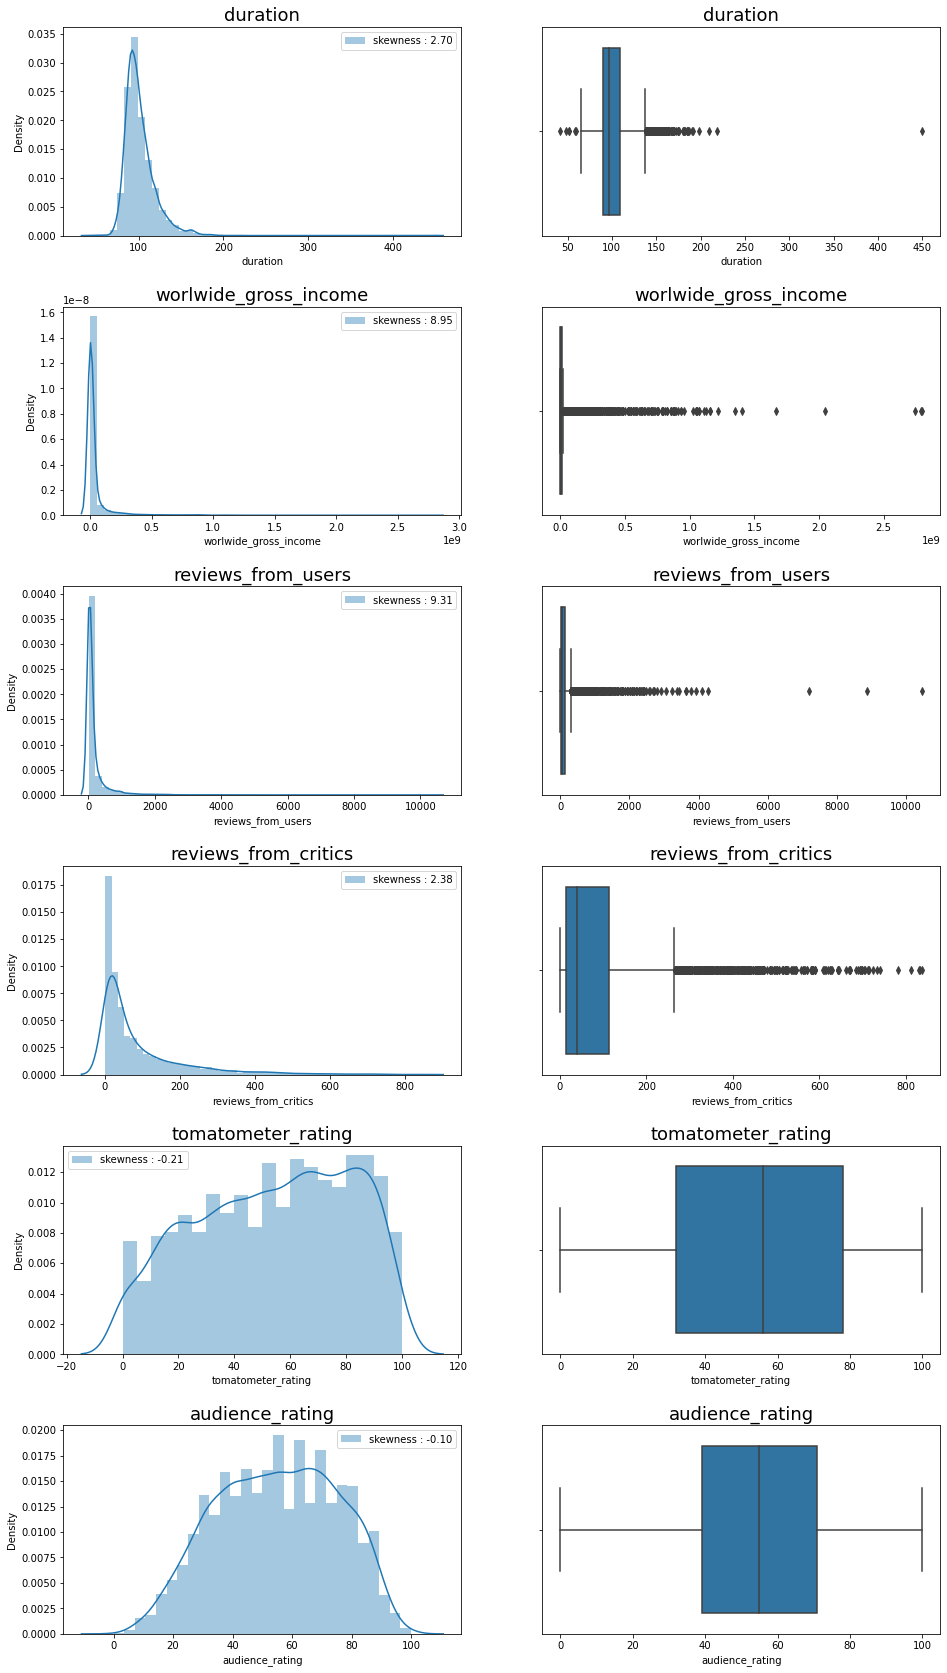

In [50]:
# Visualize distplot and boxplot on each numerical data/columns

fig, ax = plt.subplots(6, 2, figsize = (14, 24))
fig.tight_layout(pad = 5)

for i, n in enumerate(num):
    sns.distplot(ax = ax[i,0], a = imdb_rt_final[n].dropna(), label = 'skewness : %.2f'%(imdb_rt_final[n].skew()))
    ax[i,0].set_title(n, fontsize = 18)
    ax[i,0].legend(loc = 'best')
    
    sns.boxplot(ax = ax[i, 1], x = imdb_rt_final[n].dropna())
    ax[i, 1].set_title(n, fontsize = 18)
plt.show()

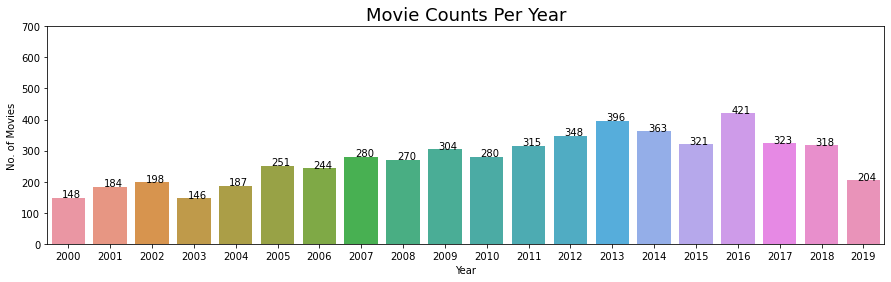

In [50]:
# Visualize movie counts release per year with barchart
import seaborn as sns
import matplotlib.pyplot as plt

max_width = 15
fig, ax = plt.subplots(figsize = (15,4))
year_movie = imdb_rt_final.groupby('year')['imdb_title_id'].count().index
count = imdb_rt_final.groupby('year')['imdb_title_id'].count()
sns.barplot(ax = ax, x = year_movie, y = count)
ax.set_title('Movie Counts Per Year', fontsize = 18)
ax.set_xlabel('Year')
for index,count in enumerate(count.astype(int)):
       ax.text(x=index-0.15 , y =count+1 , s=f"{count}" , fontdict=dict(fontsize=10))
ax.set_ylabel('No. of Movies')
ax.set_ylim(0, 700)
plt.show()

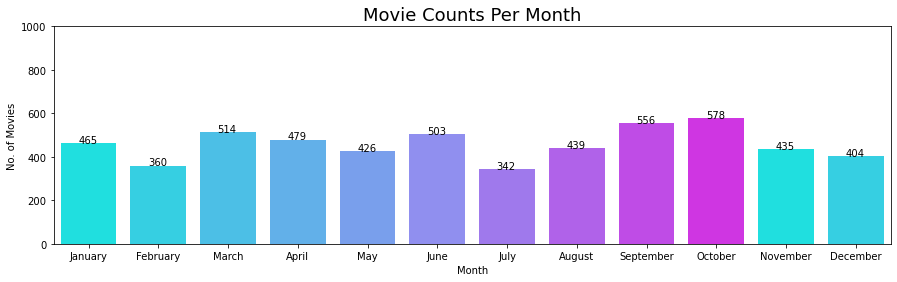

In [51]:
# Visualize movie counts release based on month with barchart
a = plt.cm.cool
max_width = 15
fig, ax = plt.subplots(figsize = (15,4))
month_released = imdb_rt_final.groupby('Month_of_Release')['imdb_title_id'].count().index
count_movies = imdb_rt_final.groupby('Month_of_Release')['imdb_title_id'].count()
sns.barplot(ax = ax, x = month_released, y = count_movies, palette=[a(0.0),a(0.1),a(0.2),a(0.3),a(0.4),a(0.5),a(0.6),a(0.7),a(0.8),a(0.9)])
ax.set_title('Movie Counts Per Month', fontsize = 18)
ax.set_xlabel('Month')
ax.set_ylabel('No. of Movies')
for index,count_movies in enumerate(count_movies):
       ax.text(x=index-0.15 , y =count_movies+0 , s=f"{count_movies}" , fontdict=dict(fontsize=10))
ax.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June'
                    , 'July', 'August', 'September', 'October', 'November', 'December'])
ax.set_ylim((0, 1000))

plt.show()

In [52]:
#Splitting genre as some movies defined with different genres

movies_genre = imdb_rt_final[['imdb_title_id', 'title', 'genre', 'worlwide_gross_income', 
             'reviews_from_users', 'reviews_from_critics','tomatometer_rating','audience_rating']]
movies_genre['genre'] = movies_genre['genre'].astype('str')

genre_split = pd.DataFrame(movies_genre['genre'].str.split(',').tolist(), index=movies_genre['imdb_title_id']).stack()
genre_split = genre_split.reset_index(['imdb_title_id'])
genre_split.columns = ['imdb_title_id', 'genre_split']
movies_genre_split = pd.merge(genre_split, movies_genre[['imdb_title_id', 'title',  'worlwide_gross_income', 
                                'reviews_from_users', 'reviews_from_critics','tomatometer_rating','audience_rating']],
                                       left_on = 'imdb_title_id', right_on = 'imdb_title_id')
movies_genre_split['genre_split'] = movies_genre_split['genre_split'].str.lstrip(' ').str.rstrip(' ')
movies_genre_split

,imdb_title_id,genre_split,title,worlwide_gross_income,reviews_from_users,reviews_from_critics,tomatometer_rating,audience_rating
0,tt0035423,Comedy,Kate & Leopold,76019048.0,341.0,115.0,50.0,62.0
1,tt0035423,Fantasy,Kate & Leopold,76019048.0,341.0,115.0,50.0,62.0
2,tt0035423,Romance,Kate & Leopold,76019048.0,341.0,115.0,50.0,62.0
3,tt0118589,Drama,Glitter,5271666.0,319.0,75.0,6.0,48.0
4,tt0118589,Music,Glitter,5271666.0,319.0,75.0,6.0,48.0
...,...,...,...,...,...,...,...,...
25033,tt9354944,Comedy,Jexi,9341824.0,234.0,42.0,17.0,71.0
25034,tt9354944,Romance,Jexi,9341824.0,234.0,42.0,17.0,71.0
25035,tt9356952,Comedy,The Death of Dick Long,36856.0,50.0,48.0,75.0,86.0
25036,tt9356952,Crime,The Death of Dick Long,36856.0,50.0,48.0,75.0,86.0


Text(0.5, 1.0, 'Genre Distribution')

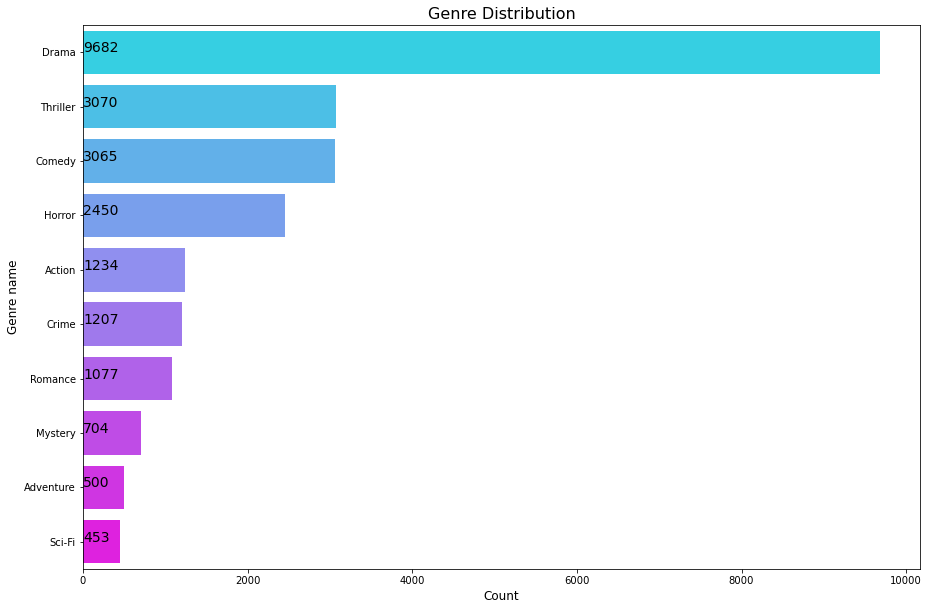

In [53]:
#Visualize Top 10 Genre based on movie Count
a = plt.cm.cool

plt.figure(figsize=(15,10))
count = movies_genre_split['genre_split'].value_counts()[:10]
sns.barplot(count.values, count.index, palette=[a(0.1),a(0.2),a(0.3),a(0.4),a(0.5),a(0.6),a(0.7),a(0.8),a(0.9),a(0.99)])
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Genre name', fontsize=12)
plt.title("Genre Distribution", fontsize=16)

Text(0.5, 1.0, 'Actors/Actresses based on Movie Count')

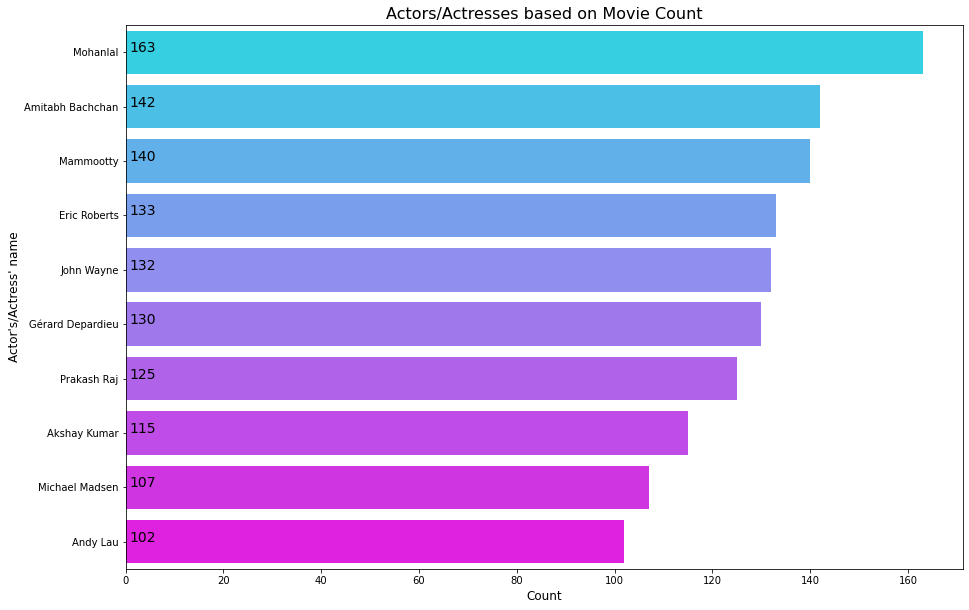

In [54]:
#Visualize Top 10 Actors/Actresses based on movie Count
a = plt.cm.cool

plt.figure(figsize=(15,10))
actor=imdb_principals_names[(imdb_principals_names['category']=='actor')|(imdb_principals_names['category']=='actress')]
movie_actor=actor['name'].value_counts()[:10]

count_actor = actor['name'].value_counts()[:10]

sns.barplot(count_actor.values, movie_actor.index,palette=[a(0.1),a(0.2),a(0.3),a(0.4),a(0.5),a(0.6),a(0.7),a(0.8),a(0.9),a(0.99)])
for i, v in enumerate(count_actor.values):
    plt.text(0.8,i,v,color='k',fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel("Actor's/Actress' name", fontsize=12)
plt.title("Actors/Actresses based on Movie Count", fontsize=16)

Text(0.5, 1.0, 'Top 10 Studio names on Number of Released Movie')

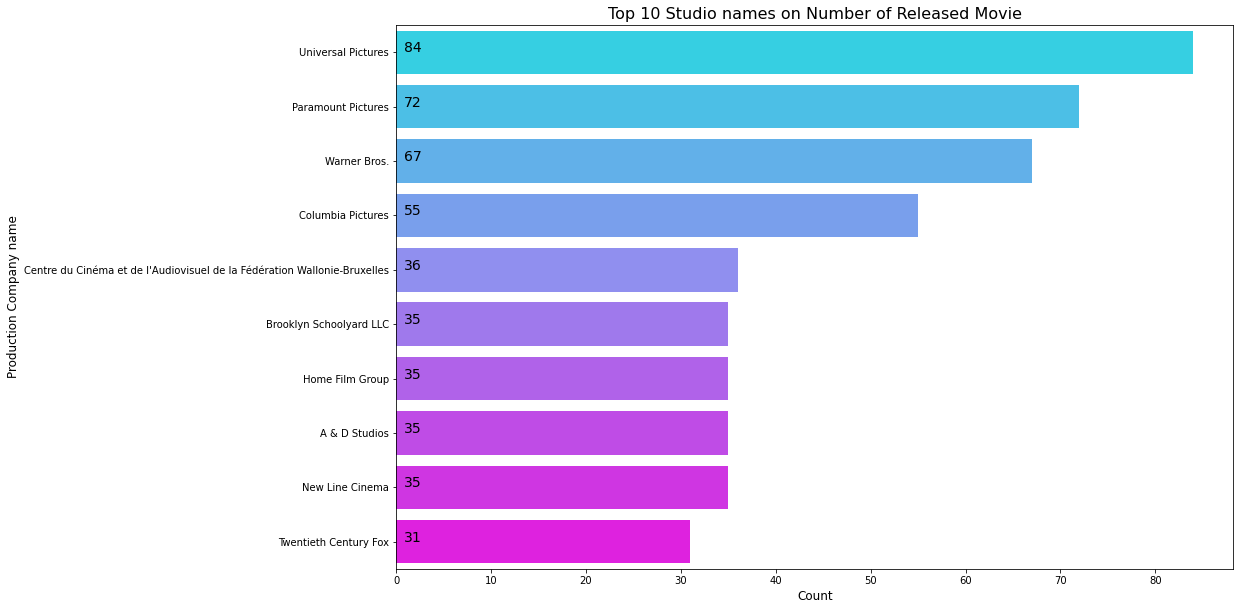

In [55]:
#Top 10 Production Companies based on Movie Count
plt.figure(figsize=(15,10))
count = imdb_rt_final["production_company_x"].value_counts()[:10]
sns.barplot(count.values, count.index, palette=[a(0.1),a(0.2),a(0.3),a(0.4),a(0.5),a(0.6),a(0.7),a(0.8),a(0.9),a(0.99)])
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Production Company name', fontsize=12)
plt.title("Top 10 Studio names on Number of Released Movie", fontsize=16)

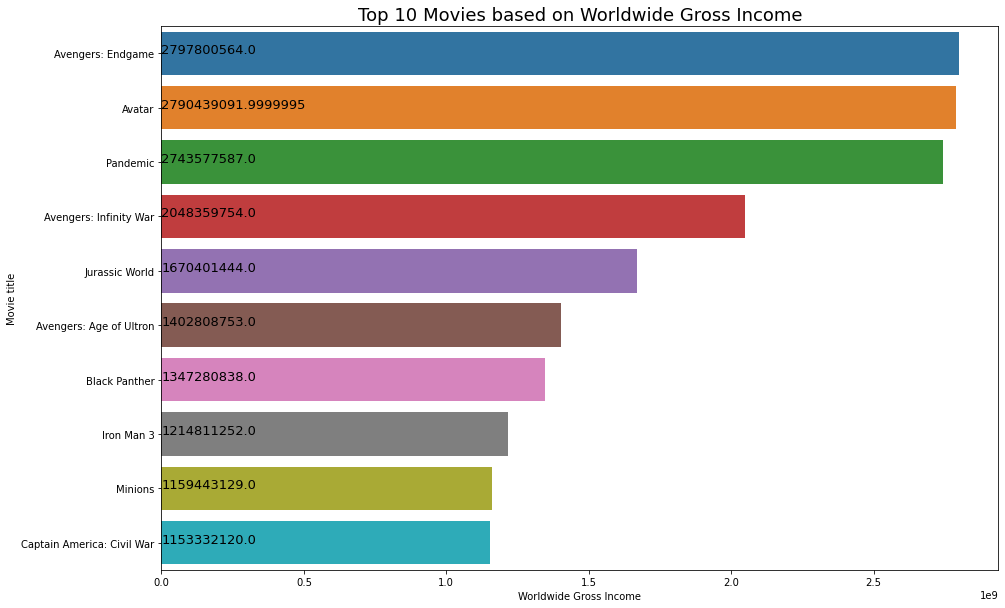

In [56]:
# Visualize top 10 movie based on worldwide gross income
top_worldwide=imdb_rt_final.sort_values(by="worlwide_gross_income", ascending=False).head(10)
max_width = 15
fig, ax = plt.subplots(figsize = (15,10))
sns.barplot(x="worlwide_gross_income", y="title",data=top_worldwide)
ax.set_title('Top 10 Movies based on Worldwide Gross Income', fontsize = 18)
ax.set_xlabel('Worldwide Gross Income')
ax.set_ylabel('Movie title')
top_income = top_worldwide['worlwide_gross_income'].sort_values(ascending = False)[:10]
for i, v in enumerate(top_income.values):
    plt.text(0.2,i,v,color='k',fontsize=13)

plt.show()

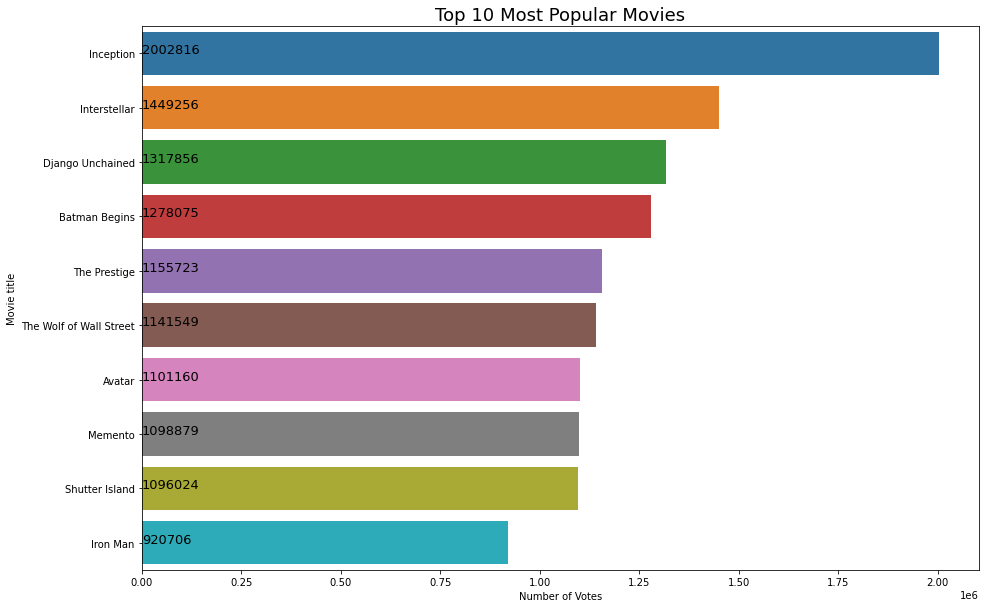

In [57]:
# Visualize top 10 movie based on popularity
top_vote=imdb_rt_final.sort_values(by="votes", ascending=False).head(10)
max_width = 15
fig, ax = plt.subplots(figsize = (15,10))
sns.barplot(x="votes", y="title",data=top_vote)
ax.set_title('Top 10 Most Popular Movies', fontsize = 18)
ax.set_xlabel('Number of Votes')
ax.set_ylabel('Movie title')
top_count_vote = top_vote['votes'].sort_values(ascending = False)[:10]
for i, v in enumerate(np.round(top_count_vote.values,2)):
    plt.text(0.1,i,v,color='k',fontsize=13)

plt.show()

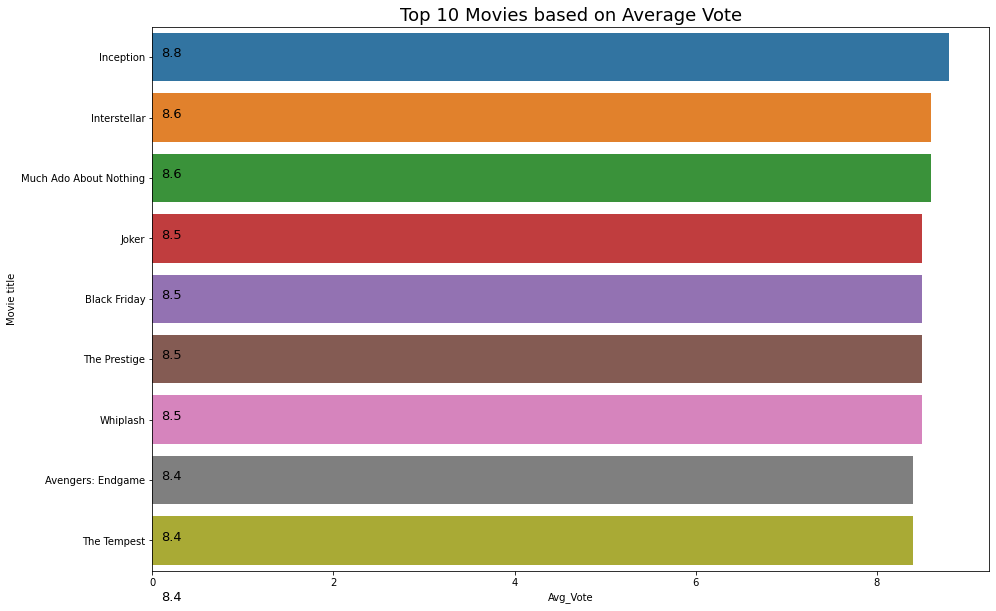

In [58]:
# Visualize top 10 movie based on average vote
top_movie=imdb_rt_final.sort_values(by="avg_vote", ascending=False).head(10)
max_width = 15
fig, ax = plt.subplots(figsize = (15,10))
sns.barplot(x="avg_vote", y="title",data=top_movie )
ax.set_title('Top 10 Movies based on Average Vote', fontsize = 18)
ax.set_xlabel('Avg_Vote')
ax.set_ylabel('Movie title')
top_count = top_movie['avg_vote'].sort_values(ascending = False)[:10]
for i, v in enumerate(top_count.values):
    plt.text(0.1,i,v,color='k',fontsize=13)

plt.show()

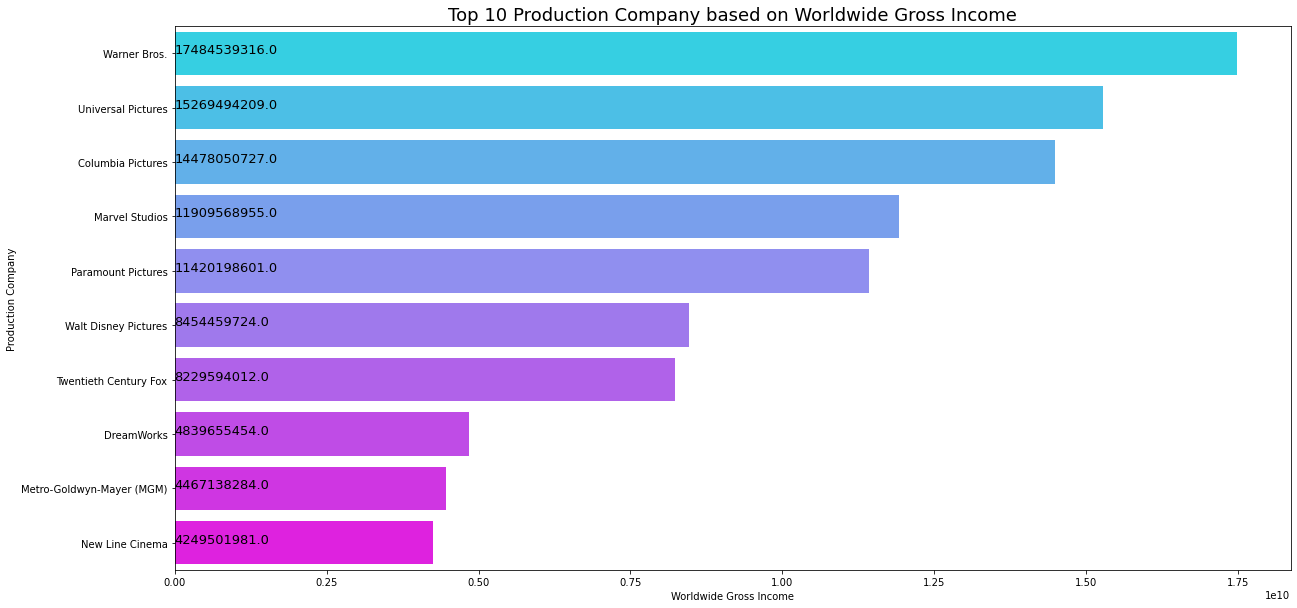

In [59]:
# Visualize top 10 Production Company based on worldwide gross income

max_width = 20
fig, ax = plt.subplots(figsize = (20,10))

prod_inc = imdb_rt_final.groupby('production_company_x')['worlwide_gross_income'].sum().sort_values(ascending = False)[:10]
inc = imdb_rt_final.groupby('production_company_x')['worlwide_gross_income'].sum().sort_values(ascending = False)[:10]
sns.barplot(inc, prod_inc.index,palette=[a(0.1),a(0.2),a(0.3),a(0.4),a(0.5),a(0.6),a(0.7),a(0.8),a(0.9),a(0.99)])
ax.set_title('Top 10 Production Company based on Worldwide Gross Income', fontsize = 18)
ax.set_xlabel('Worldwide Gross Income')
ax.set_ylabel('Production Company')

for i, v in enumerate(np.round(inc.values,2)):
    plt.text(0.1,i,v,color='k',fontsize=13)

plt.show()

In [60]:
#Splitting directors as some movies have more than one director

movies_director = imdb_rt_final[['imdb_title_id', 'title', 'director', 'worlwide_gross_income', 
             'reviews_from_users', 'reviews_from_critics','tomatometer_rating','audience_rating']]
movies_director['director'] = movies_director['director'].astype('str')

director_split = pd.DataFrame(movies_director['director'].str.split(',').tolist(), index=movies_genre['imdb_title_id']).stack()
director_split = director_split.reset_index(['imdb_title_id'])
director_split.columns = ['imdb_title_id', 'director_split']
movies_director_split = pd.merge(director_split, movies_director[['imdb_title_id', 'title',  'worlwide_gross_income', 
                                'reviews_from_users', 'reviews_from_critics','tomatometer_rating','audience_rating']],
                                       left_on = 'imdb_title_id', right_on = 'imdb_title_id')
movies_director_split['director_split'] = movies_director_split['director_split'].str.lstrip(' ').str.rstrip(' ')
movies_director_split

,imdb_title_id,director_split,title,worlwide_gross_income,reviews_from_users,reviews_from_critics,tomatometer_rating,audience_rating
0,tt0035423,James Mangold,Kate & Leopold,76019048.0,341.0,115.0,50.0,62.0
1,tt0118589,Vondie Curtis-Hall,Glitter,5271666.0,319.0,75.0,6.0,48.0
2,tt0119273,Michael Coldewey,Heavy Metal 2000,183611771.0,86.0,38.0,10.0,36.0
3,tt0119273,Michel Lemire,Heavy Metal 2000,183611771.0,86.0,38.0,10.0,36.0
4,tt0120166,David Lister,The Sorcerer's Apprentice,144056873.0,15.0,2.0,40.0,53.0
...,...,...,...,...,...,...,...,...
12678,tt9243442,Sheng Ding,S.W.A.T.,8230634.0,1.0,3.0,48.0,52.0
12679,tt9352926,Michael Tyburski,The Sound of Silence,21994.0,18.0,18.0,65.0,29.0
12680,tt9354944,Jon Lucas,Jexi,9341824.0,234.0,42.0,17.0,71.0
12681,tt9354944,Scott Moore,Jexi,9341824.0,234.0,42.0,17.0,71.0


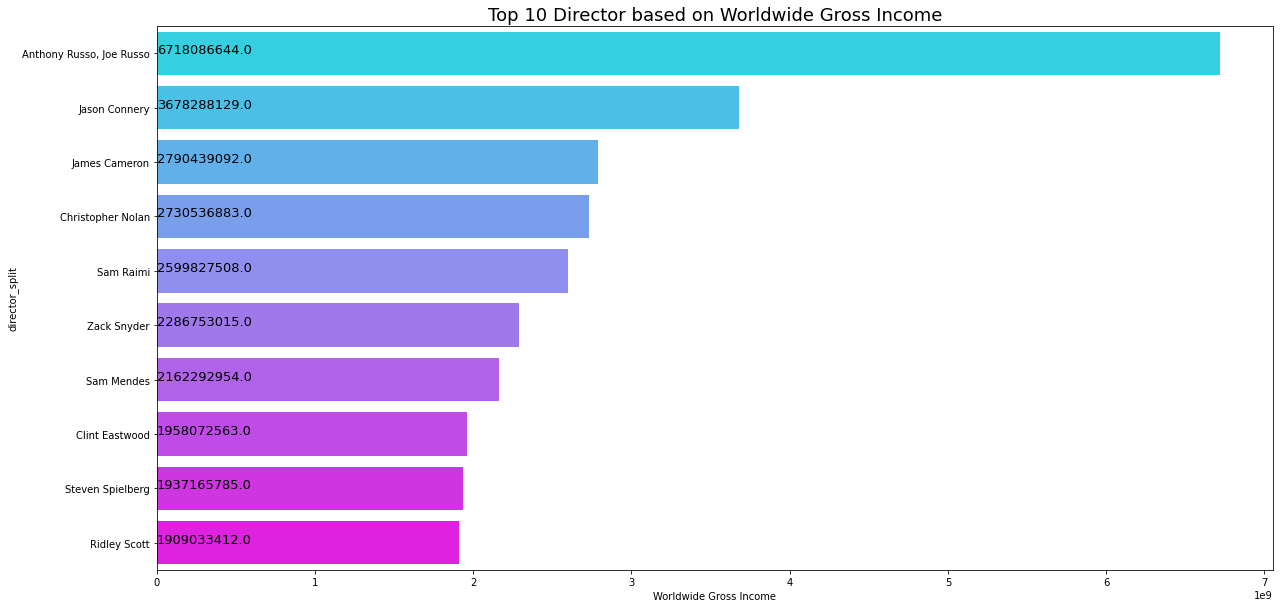

In [61]:
# Visualize top 10 Directors based on worldwide gross income

max_width = 20
fig, ax = plt.subplots(figsize = (20,10))

inc_dir = imdb_rt_final.groupby('director')['worlwide_gross_income'].sum().sort_values(ascending = False)[:10]
sns.barplot(inc_dir, inc_dir.index,palette=[a(0.1),a(0.2),a(0.3),a(0.4),a(0.5),a(0.6),a(0.7),a(0.8),a(0.9),a(0.99)])
ax.set_title('Top 10 Director based on Worldwide Gross Income', fontsize = 18)
ax.set_xlabel('Worldwide Gross Income')
ax.set_ylabel('director_split')

for i, v in enumerate(np.round(inc_dir.values,2)):
    plt.text(0.1,i,v,color='k',fontsize=13)

plt.show()

In [62]:
#created multi index dataframe to capture both sum of worlwide gross income and mean of tomatometer rating per Production Company
inc_tm=imdb_rt_final.groupby([imdb_rt_final.iloc[:,10]]).agg({'worlwide_gross_income': ['sum'], 
                                                              'tomatometer_rating': ['mean']})
inc_tm=inc_tm.sort_values(('worlwide_gross_income',  'sum'),ascending=False)[:10]
#renamed the columns to get rid of multi column and multi index
inc_tm.columns=['total_worldwide_gross_income','avg_tomatometer_rating']
inc_tm.reset_index(inplace=True)
sort=inc_tm.sort_values('avg_tomatometer_rating',ascending=False)
sort

,production_company_x,total_worldwide_gross_income,avg_tomatometer_rating
3,Marvel Studios,1.190957e+10,84.777778
5,Walt Disney Pictures,8.454460e+09,68.750000
7,DreamWorks,4.839655e+09,59.966667
0,Warner Bros.,1.748454e+10,56.373134
2,Columbia Pictures,1.447805e+10,55.472727
4,Paramount Pictures,1.142020e+10,54.319444
1,Universal Pictures,1.526949e+10,54.297619
6,Twentieth Century Fox,8.229594e+09,53.709677
8,Metro-Goldwyn-Mayer (MGM),4.467138e+09,45.703704
9,New Line Cinema,4.249502e+09,41.428571


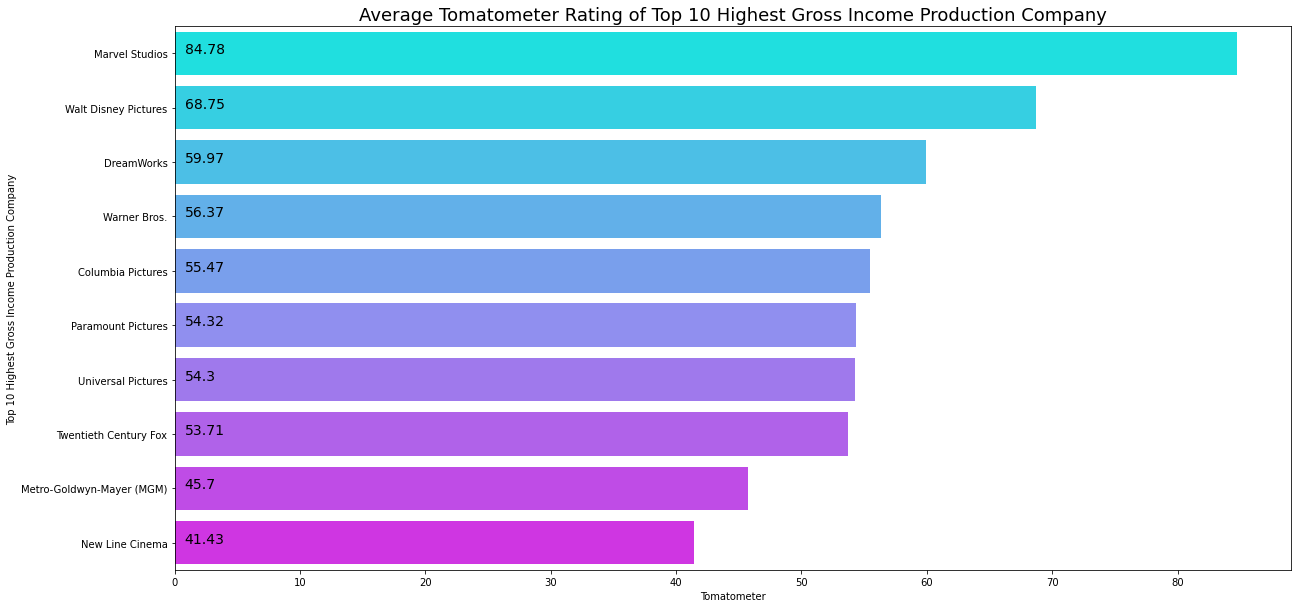

In [63]:
max_width = 20
fig, ax = plt.subplots(figsize = (20,10))
sns.barplot(ax = ax, x = 'avg_tomatometer_rating',y='production_company_x',data=sort,
            palette=[a(0.0),a(0.1),a(0.2),a(0.3),a(0.4),a(0.5),a(0.6),a(0.7),a(0.8),a(0.9)])
ax.set_title('Average Tomatometer Rating of Top 10 Highest Gross Income Production Company', fontsize = 18)
ax.set_xlabel('Tomatometer')
tm_rating=sort['avg_tomatometer_rating']
for i, v in enumerate(np.round(tm_rating.values,2)):
    plt.text(0.8,i,v,color='k',fontsize=14)
ax.set_ylabel('Top 10 Highest Gross Income Production Company')


plt.show()

In [64]:
# Reading IMDB rating file for description
imdb_rating=pd.read_csv('IMDb ratings.csv')

In [65]:
# Check the dataframe information
imdb_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   imdb_title_id              85855 non-null  object 
 1   weighted_average_vote      85855 non-null  float64
 2   total_votes                85855 non-null  int64  
 3   mean_vote                  85855 non-null  float64
 4   median_vote                85855 non-null  float64
 5   votes_10                   85855 non-null  int64  
 6   votes_9                    85855 non-null  int64  
 7   votes_8                    85855 non-null  int64  
 8   votes_7                    85855 non-null  int64  
 9   votes_6                    85855 non-null  int64  
 10  votes_5                    85855 non-null  int64  
 11  votes_4                    85855 non-null  int64  
 12  votes_3                    85855 non-null  int64  
 13  votes_2                    85855 non-null  int

In [66]:
# Fill missing values of rateings with zero
imdb_rating.fillna(0,inplace=True)
imdb_rating.head(10)

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_0age_avg_vote,males_0age_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,28,9,1,5,14,7.2,4.0,6.0,38.0,5.7,50.0,6.6,35.0,6.2,97.0,7.0,1.0,5.9,24.0,5.6,36.0,6.7,31.0,6.0,35.0,7.3,3.0,5.9,14.0,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,103,28,20,13,16,6.0,1.0,6.1,114.0,6.0,239.0,6.3,115.0,6.1,425.0,6.0,1.0,6.2,102.0,6.0,210.0,6.2,100.0,6.2,50.0,0.0,0.0,5.9,12.0,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,32,16,5,6,4,0.0,0.0,5.5,25.0,5.8,72.0,6.2,62.0,5.9,146.0,0.0,0.0,5.5,21.0,5.9,67.0,6.2,55.0,5.7,15.0,0.0,0.0,5.8,4.0,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,117,63,26,25,16,0.0,0.0,5.3,23.0,5.0,111.0,5.3,193.0,5.1,299.0,0.0,0.0,5.2,20.0,4.9,96.0,5.2,171.0,5.9,39.0,0.0,0.0,5.7,3.0,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,169,66,39,20,87,7.5,4.0,7.0,402.0,7.0,895.0,7.1,482.0,7.0,1607.0,8.0,2.0,7.0,346.0,7.0,804.0,7.0,396.0,7.2,215.0,7.0,2.0,7.0,52.0,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0
5,tt0002199,5.7,484,5.8,6.0,33,15,48,80,123,77,36,20,18,34,0.0,0.0,5.6,35.0,5.6,177.0,5.8,168.0,5.7,354.0,0.0,0.0,5.6,32.0,5.7,159.0,5.8,151.0,5.8,31.0,0.0,0.0,6.3,3.0,5.1,13.0,6.5,15.0,5.5,67.0,5.9,173.0,5.6,181.0
6,tt0002423,6.8,753,6.8,7.0,80,65,105,209,142,80,27,13,4,28,3.0,1.0,6.4,59.0,6.7,287.0,7.0,276.0,6.6,530.0,3.0,1.0,6.4,41.0,6.6,240.0,6.8,238.0,7.4,93.0,0.0,0.0,6.5,16.0,7.2,40.0,8.2,34.0,6.2,88.0,6.6,139.0,6.8,455.0
7,tt0002445,6.2,273,6.2,6.0,15,8,30,74,66,40,22,6,2,10,6.0,1.0,5.9,34.0,6.2,99.0,6.3,69.0,6.2,191.0,6.0,1.0,5.8,29.0,6.2,85.0,6.3,64.0,6.3,21.0,0.0,0.0,6.5,5.0,6.3,11.0,6.2,5.0,5.7,41.0,5.8,40.0,6.2,154.0
8,tt0002452,6.7,198,7.1,7.0,53,7,23,35,30,24,12,5,3,6,0.0,0.0,7.4,28.0,6.7,104.0,6.5,39.0,6.7,153.0,0.0,0.0,7.3,24.0,6.6,92.0,6.5,33.0,7.0,19.0,0.0,0.0,8.3,3.0,6.8,10.0,6.8,6.0,5.4,25.0,6.7,25.0,6.8,135.0
9,tt0002461,5.5,225,5.4,6.0,9,6,22,34,53,40,23,8,4,26,0.0,0.0,5.9,11.0,5.3,95.0,5.8,72.0,5.5,168.0,0.0,0.0,5.9,11.0,5.2,88.0,5.8,63.0,7.7,15.0,0.0,0.0,0.0,0.0,7.2,6.0,9.7,9.0,5.4,37.0,5.8,109.0,5.4,68.0


__How does IMDB calculate the weighted average?__

IMDB uses the following equation to calculate the weighted averages:

wr=(v/(v+m))R+(m/(v+m))C
 
where

v = number of votes on the movie

m = minimum number of votes to be in the top 50 (currently 1000 votes)

R = average/mean rating for the movie

C = mean rating across whole dataset 

Thus, we will calculate these weighted averages and replace the relevant columns.

In [67]:
# Define function to calculate weighted averages and replace the relevant column
def weighted_averages(number, avg, row):
    if row[number] != 0.0:
        wr = ((row[number]/(row[number]+1000))*row[avg]) + ((1000/(row[number]+1000))*5.9)
    else:
        wr = 0
    return wr
    
weighted_allgenders_0age = []
weighted_allgenders_18age = []
weighted_allgenders_30age = []
weighted_allgenders_45age = []
weighted_males_allages = []
weighted_males_0age = []
weighted_males_18age = []
weighted_males_30age = []
weighted_males_45age = []
weighted_females_allages = []
weighted_females_0age = []
weighted_females_18age = []
weighted_females_30age = []
weighted_females_45age = []

for i in range(len(imdb_rating)):
    weighted_allgenders_0age.append(weighted_averages('allgenders_0age_votes', 'allgenders_0age_avg_vote', imdb_rating.iloc[i]))
    weighted_allgenders_18age.append(weighted_averages('allgenders_18age_votes', 'allgenders_18age_avg_vote', imdb_rating.iloc[i]))
    weighted_allgenders_30age.append(weighted_averages('allgenders_30age_votes', 'allgenders_30age_avg_vote', imdb_rating.iloc[i]))
    weighted_allgenders_45age.append(weighted_averages('allgenders_45age_votes', 'allgenders_45age_avg_vote', imdb_rating.iloc[i]))
    weighted_males_allages.append(weighted_averages('males_allages_votes', 'males_allages_avg_vote', imdb_rating.iloc[i]))
    weighted_males_0age.append(weighted_averages('males_0age_votes', 'males_0age_avg_vote', imdb_rating.iloc[i]))
    weighted_males_18age.append(weighted_averages('males_18age_votes', 'males_18age_avg_vote', imdb_rating.iloc[i]))
    weighted_males_30age.append(weighted_averages('males_30age_votes', 'males_30age_avg_vote', imdb_rating.iloc[i]))
    weighted_males_45age.append(weighted_averages('males_45age_votes', 'males_45age_avg_vote', imdb_rating.iloc[i]))
    weighted_females_allages.append(weighted_averages('females_allages_votes', 'females_allages_avg_vote', imdb_rating.iloc[i]))
    weighted_females_0age.append(weighted_averages('females_0age_votes', 'females_0age_avg_vote', imdb_rating.iloc[i]))
    weighted_females_18age.append(weighted_averages('females_18age_votes', 'females_18age_avg_vote', imdb_rating.iloc[i]))
    weighted_females_30age.append(weighted_averages('females_30age_votes', 'females_30age_avg_vote', imdb_rating.iloc[i]))
    weighted_females_45age.append(weighted_averages('females_45age_votes', 'females_45age_avg_vote', imdb_rating.iloc[i]))
    
imdb_rating['weighted_allgenders_0age'] = weighted_allgenders_0age
imdb_rating['weighted_allgenders_18age'] = weighted_allgenders_18age
imdb_rating['weighted_allgenders_30age'] = weighted_allgenders_30age
imdb_rating['weighted_allgenders_45age'] = weighted_allgenders_45age
imdb_rating['weighted_males_allages'] = weighted_males_allages
imdb_rating['weighted_males_0age'] = weighted_males_0age
imdb_rating['weighted_males_18age'] = weighted_males_18age
imdb_rating['weighted_males_30age'] = weighted_males_30age
imdb_rating['weighted_males_45age'] = weighted_males_45age
imdb_rating['weighted_females_allages'] = weighted_females_allages
imdb_rating['weighted_females_0age'] = weighted_females_0age
imdb_rating['weighted_females_18age'] = weighted_females_18age
imdb_rating['weighted_females_30age'] = weighted_females_30age
imdb_rating['weighted_females_45age'] = weighted_females_45age

imdb_rating = imdb_rating[['imdb_title_id', 'weighted_average_vote', 'weighted_allgenders_0age', 'weighted_allgenders_18age', 'weighted_allgenders_30age', 'weighted_allgenders_45age',
            'weighted_males_allages', 'weighted_males_0age', 'weighted_males_18age', 'weighted_males_30age', 'weighted_males_45age',
            'weighted_females_allages', 'weighted_females_0age', 'weighted_females_18age', 'weighted_females_30age', 'weighted_females_45age']]

In [71]:
# Merge genre to rating
imdb_rating = pd.merge(imdb_rating, imdb_movies[['imdb_title_id',"title",'genre']],
                                 left_on = ['imdb_title_id'], right_on = ['imdb_title_id'])

imdb_rating.head()

,imdb_title_id,weighted_average_vote,weighted_allgenders_0age,weighted_allgenders_18age,weighted_allgenders_30age,weighted_allgenders_45age,weighted_males_allages,weighted_males_0age,weighted_males_18age,weighted_males_30age,weighted_males_45age,weighted_females_allages,weighted_females_0age,weighted_females_18age,weighted_females_30age,weighted_females_45age,title,genre
0,tt0000009,5.9,5.905179,5.903661,5.890476,5.923671,5.926527,5.901099,5.900000,5.889575,5.924054,5.903382,5.904187,5.900000,5.897433,5.894422,Miss Jerry,Romance
1,tt0000574,6.1,5.900100,5.920467,5.919290,5.941256,5.959649,5.900100,5.927768,5.917355,5.927273,5.914286,0.000000,5.900000,5.906745,5.909665,The Story of the Kelly Gang,"Biography, Crime, Drama"
2,tt0001892,5.8,0.000000,5.890244,5.893284,5.917514,5.900000,0.000000,5.891773,5.900000,5.915640,5.897044,0.000000,5.899602,5.899602,5.906256,Den sorte drøm,Drama
3,tt0002101,5.2,0.000000,5.886510,5.810081,5.802934,5.715858,0.000000,5.886275,5.812409,5.797780,5.900000,0.000000,5.899402,5.894477,5.904114,Cleopatra,"Drama, History"
4,tt0002130,7.0,5.906375,6.215407,6.419525,6.290283,6.578059,5.904192,6.182764,6.390244,6.212034,6.130041,5.902196,5.954373,6.006100,6.007242,L'Inferno,"Adventure, Drama, Fantasy"


In [72]:
# Define function to select 10 top rows for each category
def top10(column, group):
    titles = []
    scores = []
    top10=imdb_rating[column].nlargest(10)
    for i in range(len(top10)):
        index = top10.index[i]
        score = top10.iloc[i]
        scores.append(score)
        title = imdb_rating['title'].iloc[index]
        titles.append(title)
        print(i+1, '.', title, ':', score)


In [73]:
# 10 top of overall weighted average votes
top10('weighted_average_vote', ' Overall')

1 . Suvarna Sundari : 9.9
2 . Lejos de Casa pelicula Venezolana : 9.8
3 . Jeeudo : 9.8
4 . Ek : 9.8
5 . Notuku Potu : 9.8
6 . Meka Suri : 9.7
7 . Hopeful Notes : 9.7
8 . Vaarthakal Ithuvare : 9.7
9 . The Moving on Phase : 9.5
10 . Isha : 9.5


In [74]:
# 10 top of weighted average votes given by under 18-year old
top10('weighted_allgenders_0age', ' by Under 18s - Both Genders')

1 . Il cavaliere oscuro : 8.134452696157572
2 . Le ali della libertà : 8.126777087646653
3 . Avengers: Infinity War : 8.009593894794222
4 . Avengers: Endgame : 7.95551714969423
5 . Joker : 7.87936507936508
6 . Inception : 7.846726190476191
7 . Wheels : 7.802202643171807
8 . Forrest Gump : 7.756271444910409
9 . Il padrino : 7.705434782608696
10 . Pulp Fiction : 7.695875383940324


In [75]:
# 10 top of weighted average votes given by 18-30-year old
top10('weighted_allgenders_18age', ' by Users Aged 18-30')

1 . Le ali della libertà : 9.293068665065665
2 . Il cavaliere oscuro : 9.193692443547368
3 . Il padrino : 9.1894613134397
4 . Montagna II : 9.120718816067653
5 . Il Signore degli Anelli - Il ritorno del re : 9.090895382251686
6 . La parola ai giurati : 9.078630480947739
7 . Hababam Sinifi : 9.066634917611202
8 . Inception : 8.993848913440322
9 . Schindler's List : 8.986166272479808
10 . Il padrino - Parte II : 8.985210840930668


In [76]:
# save data file as a json file
imdb_rt_final.to_json(r'imdb_rt_final.json')

In [77]:
#read json into dataframe
testing= pd.read_json (r'imdb_rt_final.json')
testing.head()

,imdb_title_id,title,year,Month_of_Release,genre,duration,country,language,director,writer,production_company_x,worlwide_gross_income,avg_vote,votes,reviews_from_users,reviews_from_critics,content_rating,tomatometer_status,tomatometer_rating,audience_rating
0,tt0035423,Kate & Leopold,2001,12,"Comedy, Fantasy, Romance",118,USA,"English, French",James Mangold,"Steven Rogers, James Mangold",Konrad Pictures,76019048.0,6.4,77852,341.0,115.0,PG-13,Rotten,50.0,62.0
1,tt0118589,Glitter,2001,9,"Drama, Music, Romance",104,USA,English,Vondie Curtis-Hall,"Cheryl L. West, Kate Lanier",Twentieth Century Fox,5271666.0,2.2,21298,319.0,75.0,PG-13,Rotten,6.0,48.0
2,tt0119273,Heavy Metal 2000,2000,7,"Animation, Action, Adventure",88,"Canada, Germany",English,"Michael Coldewey, Michel Lemire","Simon Bisley, R. Payne Cabeen",CinéGroupe,183611771.0,5.4,7569,86.0,38.0,R,Rotten,10.0,36.0
3,tt0120166,The Sorcerer's Apprentice,2001,7,"Adventure, Family, Fantasy",86,UK,"English, French",David Lister,Brett Morris,Peakviewing Transatlantic,144056873.0,4.4,496,15.0,2.0,PG,Rotten,40.0,53.0
4,tt0120467,Vulgar,2000,4,"Crime, Drama, Thriller",87,USA,English,Bryan Johnson,Bryan Johnson,Chango Productions,15927.0,5.3,3906,119.0,23.0,R,Rotten,23.0,41.0


# 6.0 Conclusion

We employed the following techniques as part of our data wrangling approach:

1.   Import libraries to be used in the analysis
2.   Import data from various sources - csv and html
3.   Subset data based on conditions or on columns
4.   Join data across multiple datasets
5.   Identify same columns with different names in different datasets
6.   Fill missing values or replace them with values from a different source
7.   Drop rows or columns
8.   Use functions and list comprehension to reduce the number of lines of code
9.   Use stack method
10.  Rename variables and transform datatypes
11.  Split cells with multiple pieces of data within a single cell
12.  Group data by category
13.  Import libraries to be used in the analysis
14.  Create descriptive statistics on numerical variables
15.  Create attractive visualizations to answer various questions
16.  Produced a cleaned dataset that can be used for machine learning project  
17.  Read and write data into different file formats - json as an example
18.  Converted jupyter notebook into a slide deck

Based on the above, the goal of our project was achieved.